In [1]:
"""operate in parent directory"""

import os
import sys


sys.path.insert(0, os.getcwd() + "/..")

In [2]:
"""play games"""

from tqdm import tqdm

from titans.ai import Trainer


num_trainers = 10
trainers = [Trainer(baseline=True).train() for _ in tqdm(range(num_trainers))]

100%|██████████| 10/10 [19:46<00:00, 118.61s/it]


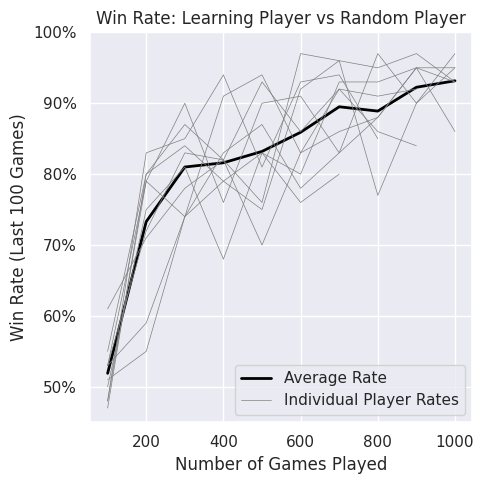

In [8]:
"""plot results"""

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns


# extract scores, compute mean
win_frac = [
    (
        trainer.metrics["vs_baseline"]
        + [np.NaN] * (
            trainers[0]._epochs
            - len(trainer.metrics["vs_baseline"])
        )
    )
    for trainer in trainers
]
overall_win_frac = np.nanmean(win_frac, axis=0)

# make pretty
sns.set_theme()

# make figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# plot player stats
epochs = trainers[0]._epochs
games_per_epoch = trainers[0]._games_per_epoch
x = range(
    games_per_epoch,
    games_per_epoch * epochs + 1,
    games_per_epoch,
)
ax.plot(x, 100 * overall_win_frac, color="black", lw=2)
for y in win_frac:
    ax.plot(x, 100 * np.array(y), color="gray", lw=.5)

# label figure
ax.set_xlabel("Number of Games Played")
ax.set_ylabel(f"Win Rate (Last {games_per_epoch} Games)")
ax.set_title("Win Rate: Learning Player vs Random Player")
ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend(["Average Rate", "Individual Player Rates"])
ax.set_ylim([45, 100])

# show plot
fig.tight_layout()
plt.show()